# SPIE-AAPM Lung CT Challenge

### Informacje podstawowe:
* __Rodzaj bazy danych__: obrazowa + tabelaryczna
* __Możliwe zadania__: klasyfikacja
* __Licencje__: TCIA Data Usage Policy, Creative Commons Attribution 3.0 Unported License
* __Annotacje__: etykiety z rodzajem zmian
* __Wymiar zdjęć__: 2D

### Dane ilościowe
* __Liczba zdjęć__: 22489
* __Liczba pacjentw__: 70
* __Rodzaj zdjęć__: CT
* __Liczba atrybutów DICOM__: ok. 160 w zależności od zdjęcia
* __Średnia liczba zdjęć (sliceów) na pajenta__: 321
* __Maksymalna liczba zdjęć (sliceów)__: 469
* __Minimalna liczba zdjęć (sliceów)__: 202

### Informacje o danych
* __Rozszerzenia zdjęć__: .dcm (DICOM)
* __Sprzęt użyty do wykonania zdjęć__: PHILIPS Brilliance 16P / PHILIPS Brilliance 64
* __Płaszczyzna zdjęć__: pozioma (względem pacjenta stojącego)
* __Nazwy klas w zbiorze testowym__: Benign nodule, Primary lung cancer, Suspicious malignant nodule
* __Nazwy klas w zbiorze treningowym__: benign, malignant 
* __Kontrast__: w zależności od pacjenta
* __Zakres lat__: 2006 - 2007
* __CT Slice thickness__: 1mm
* __Spacial Resolution__: brak informacji
* __Podział na zbiór treningowy i testowy__: TAK
* __Kraj pochodzenia danych__: USA

### Balans danych
* __Balans zbioru treningowego/testowego__: 10/60
* __Balans klas w zbiorze treningowym (benign/malignant)__: 5/5
* __Balans klas w zbiorze testowym (Benign nodule/Primary lung cancer/Suspicious malignant nodule)__: 37/34/2
* __Balans płci (K/M)__: 42/28
* __Najmłodszy pacjent__: 18 lat
* __Najstarszy pacjent__: 84 lata 
* __Rozkład wieku__: patrz histogram niżej
* __Rozkład wieku w zależności od płci__: patrz violinplot poniżej
* __Rozkład ilości zdjęć w zależności od płci__: patrz violinplot poniżej
* __Rozkład wieku w zależności od obecnej choroby__: patrz violinplot poniżej


<AxesSubplot:ylabel='Count'>

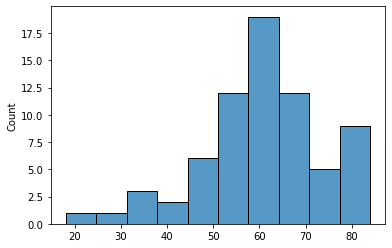

In [117]:
sns.histplot(ages)
#histogram przedstawiający rozkłąd wieku pacjentów

<AxesSubplot:>

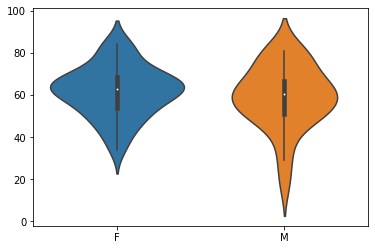

In [138]:
sns.violinplot(sexes, ages)
#violinplot przedstawiający rozkład wieku w zależności od płci pacjentów

<AxesSubplot:>

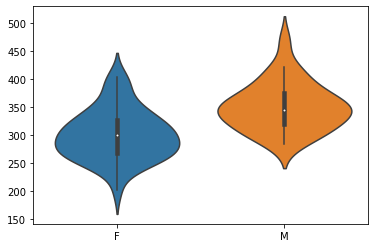

In [140]:
sns.violinplot(sexes, number_of_pics)
#violinplot przedstawiający rozkład ilości sliceów w zależności od płci pacjenta

<AxesSubplot:>

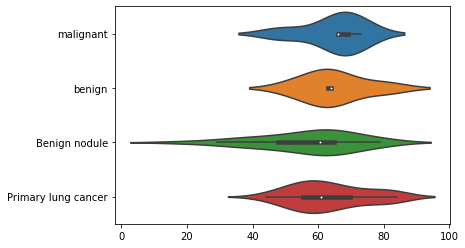

In [179]:
sns.violinplot(ages, diagnosis)
#violinplot przedstawiający rozkład wieku w zależności od obecnej choroby

### Metadane
* __Informacje o poważności zmian__: niedostępne
* __Pacjenci covidowi__: brak
* __Usunięte dane__: imię i nazwisko
* __Dostępne metadane z formatu DICOM__:

In [128]:
pydicom.filereader.dcmread(first_slices[0])

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113704.1.111.5044.1167842488.11984
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'HELIX']
(0008, 0012) Instance Creation Date              DA: '20070103'
(0008, 0013) Instance Creation Time              TM: '104128'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113704.1.111.5044.1167842488.11984
(0008

* __Problemy z powyższymi danymi__:
    * bardzo dużo zbędnych kolumn
    * znaczna część kolumn nazywa się [Unknown]
    * niektóre kolumny zawierają puste wartości
* __Problemy z metadanymi tabelarycznymi__:
    * niespójne klasy pomiędzy train i test setem
    * lokalizacja zmiany chorobowej podana tylko dla pojedyńczego slicea jako pojedyńczy punkt
    * brak onformacji o rozmiarze zmiany chorobowej
    

***
---
___

### Brudnopis:

In [109]:
import pydicom
import warnings

warnings.filterwarnings("ignore")

In [107]:
metadata = pydicom.filereader.dcmread(first_slices[1])
len(metadata)

165

In [11]:
import os
path = "D:\\Datasets\\manifest-cgqtDj7Y2699835271585651107\\SPIE-AAPM Lung CT Challenge"

In [17]:
dirs = []
for filename in os.scandir(path):
    if filename.is_dir():
        dirs.append(filename.path)

In [28]:
dirs2 = []
for dir in dirs:
    for filename in os.scandir(dir):
        if filename.is_dir():
            dirs2.append(filename.path)

In [33]:
dirs3 = []
for dir in dirs2:
    for filename in os.scandir(dir):
        if filename.is_dir():
            dirs3.append(filename.path)

In [129]:
first_slices = []
number_of_pics = []
for dir in dirs3:
    i = 0
    for filename in os.scandir(dir):
        i += 1
        if filename.name == "1-001.dcm":
            first_slices.append(filename.path)
    number_of_pics.append(i)

In [42]:
all_data = []

for path in first_slices:
    all_data.append(pydicom.filereader.dcmread(path))

In [57]:
from datetime import datetime

In [93]:
sexes = []
ages = []
for data in all_data:
    sexes.append(data.get("PatientSex"))
    age = int(data.get("PatientAge")[1:-1])
    ages.append(age)

In [96]:
import numpy as np
np.mean(ages)

60.65714285714286

In [110]:
import seaborn as sns


In [104]:
M = 0
F = 0
for sex in sexes:
    if sex =="F":
        F+=1
    elif sex =="M":
        M+=1
print(f"{F=}")
print(f"{M=}")

F=42
M=28


In [119]:
max(ages)

84

In [134]:
min(number_of_pics)

202

In [135]:
max(number_of_pics)

469

In [136]:
np.mean(number_of_pics)

321.27142857142854

In [147]:
import pandas as pd
train_set = pd.read_excel("CalibrationSet_NoduleData.xlsx", nrows=10)
test_set = pd.read_excel("TestSet_NoduleData_PublicRelease_wTruth.xlsx", nrows=73)
train_set

,Scan Number,"Nodule Center x,y Position*",Nodule Center Image,Diagnosis
0,CT-Training-lc001,"120, 325",135,malignant
1,CT-Training-lc002,"139, 359",70,malignant
2,CT-Training-lc003,"375, 323",70,malignant
3,CT-Training-lc008,"95, 328",65,malignant
4,CT-Training-lc009,"145, 299",63,malignant
5,CT-Training-be001,"405, 296",169,benign
6,CT-Training-be002,"184, 268",117,benign
7,CT-Training-be006,"449, 266",241,benign
8,CT-Training-be007,"385, 206",194,benign
9,CT-Training-be010,"120, 336",69,benign


In [177]:
x = test_set.drop_duplicates(subset="Scan Number")[["Scan Number" , "Final Diagnosis"]]
x.rename({"Final Diagnosis": "Diagnosis"}, axis=1, inplace=True)
x
y = train_set[["Scan Number", "Diagnosis"]]
xy = pd.concat([y, x])
diagnosis = list(xy["Diagnosis"])
for i in range(len(diagnosis)-1):
    if diagnosis[i] == "Primary lung cancer ":
        diagnosis[i] = "Primary lung cancer"